## Timeseries with `pandas`

One useful application it to deal with time series data, since you generally end up with a mixed format with datetime and some other data type such as integer or floating point.

In [1]:
import pandas as pd
import numpy as np

Let's assume we want something more descriptive than a UNIX timestamp, how do we do it?

In [2]:
from datetime import datetime

In [3]:
now = datetime.now()

In [4]:
print(now)

2018-11-14 11:22:23.375303


In [5]:
print(now.month, now.day, now.minute)

11 14 22


#### Formatting time

In [7]:
formatted = now.strftime('%Y-%m-%d')

In [8]:
print(formatted)

2018-11-14


### `pandas` Series indexed by timestamps

Let's do some advanced futurism.

In [9]:
from datetime import timedelta
interval = timedelta(days=1)

TIP: you can specify time units implicitely using the ordering, but don't.

In [10]:
print(interval)

1 day, 0:00:00


In [15]:
times = now + np.arange(1,10)*interval
print(times)

[datetime.datetime(2018, 11, 15, 11, 22, 23, 375303)
 datetime.datetime(2018, 11, 16, 11, 22, 23, 375303)
 datetime.datetime(2018, 11, 17, 11, 22, 23, 375303)
 datetime.datetime(2018, 11, 18, 11, 22, 23, 375303)
 datetime.datetime(2018, 11, 19, 11, 22, 23, 375303)
 datetime.datetime(2018, 11, 20, 11, 22, 23, 375303)
 datetime.datetime(2018, 11, 21, 11, 22, 23, 375303)
 datetime.datetime(2018, 11, 22, 11, 22, 23, 375303)
 datetime.datetime(2018, 11, 23, 11, 22, 23, 375303)]


In [16]:
predictions = np.random.rand(len(times))

In [17]:
print(predictions)

[ 0.84694668  0.96994249  0.13741961  0.83138988  0.00106873  0.29955954
  0.64700211  0.39734047  0.52573096]


In [18]:
the_future = pd.Series(predictions, index=times)
print(the_future)

2018-11-15 11:22:23.375303    0.846947
2018-11-16 11:22:23.375303    0.969942
2018-11-17 11:22:23.375303    0.137420
2018-11-18 11:22:23.375303    0.831390
2018-11-19 11:22:23.375303    0.001069
2018-11-20 11:22:23.375303    0.299560
2018-11-21 11:22:23.375303    0.647002
2018-11-22 11:22:23.375303    0.397340
2018-11-23 11:22:23.375303    0.525731
dtype: float64


You can do indexing/subsetting *etc.* in the same way as you would to a numpy array - you can use an integer to specify the place in the series. 

In [19]:
print(the_future[:])

2018-11-15 11:22:23.375303    0.846947
2018-11-16 11:22:23.375303    0.969942
2018-11-17 11:22:23.375303    0.137420
2018-11-18 11:22:23.375303    0.831390
2018-11-19 11:22:23.375303    0.001069
2018-11-20 11:22:23.375303    0.299560
2018-11-21 11:22:23.375303    0.647002
2018-11-22 11:22:23.375303    0.397340
2018-11-23 11:22:23.375303    0.525731
dtype: float64


In [20]:
print(the_future[0])

0.846946684003


Alternatively, you can use the keys:

In [21]:
print(the_future[times[0]])

0.846946684003


We can also use date ranges:

In [23]:
some_range = pd.date_range(times[0], times[2], freq='D')

In [24]:
print(some_range)

DatetimeIndex(['2018-11-15 11:22:23.375303', '2018-11-16 11:22:23.375303',
               '2018-11-17 11:22:23.375303'],
              dtype='datetime64[ns]', freq='D')


### Plotting

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

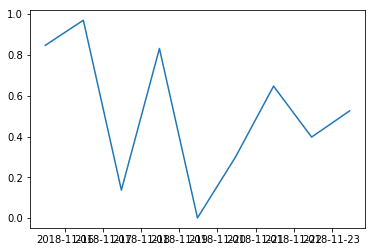

In [26]:
plt.plot(the_future);

Pretty ugly.  First let's sort out those axis labels...

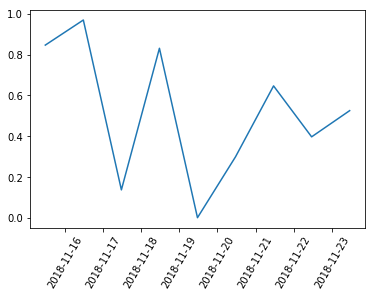

In [27]:
plt.xticks(rotation=60)
plt.plot(the_future);

Surprisingly this just looks like a load of random noise.  Probably it would look better if we make our predictions less fine grained (in case it is not clear, never go about analyzing your data like this...)

In [28]:
the_future_2day = the_future.resample('2D').mean()
print(the_future_2day)

2018-11-15 11:22:23.375303    0.908445
2018-11-17 11:22:23.375303    0.484405
2018-11-19 11:22:23.375303    0.150314
2018-11-21 11:22:23.375303    0.522171
2018-11-23 11:22:23.375303    0.525731
Freq: 2D, dtype: float64


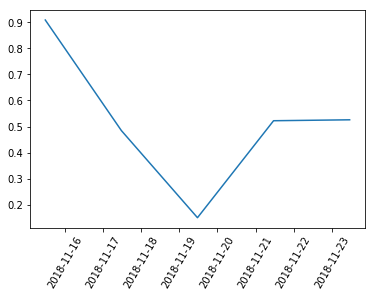

In [29]:
plt.xticks(rotation=60)
plt.plot(the_future_2day);

We're doing silly things to made up data.  Still I would argue this plot is misleading compared to the last one, why?

Let's fix it.

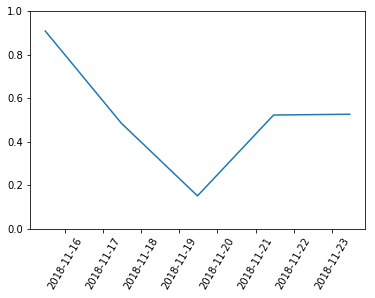

In [30]:
plt.xticks(rotation=60)
plt.ylim((0,1))
plt.plot(the_future_2day);